# Project 1: **Preprocessing**

Data preprocessing is a data mining technique used to transform raw data into a useful and efficient format. For some datas that are null or noisy we use this method to fill those tuples with average value, the nearest value or some other solutions we can use. 


**Steps involved in data preprocessing :**

1.   Importing the required Libraries
2.   Importing the data set
3.   Handling the Missing Data.
4.   Encoding Categorical Data.
5.   Splitting the data set into test set and training set.
6.   Feature Scaling.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Connect to google drive 
from google.colab import drive

drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


After we upload the dataset, we need to know the number of missing data so we use info function to show us some useful information about our dataset. It shows how many columns we have with their names and for ech column how many filled rows we have. 

In [3]:
# Upload the Car_prices_classification.csv file to your google drive
dataset_address = 'drive/MyDrive/Car_prices_classification.csv'
df = pd.read_csv(dataset_address)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price_class      117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


**Clean the data:** 

*Check for missing values, duplicates, and outliers in the data.*

As we can see there's column generation_name with so many tuples with missing values so we can drop it cause it's obviosly useless and makes our predictions more possible to be wrong and far from actual result. 

So we drop some of the columns which won't contribute much to our machine learning model. Next we can drop all rows in the data that have missing values (NaNs). because we don't have any null values we can skip this part. 

*   axis : It can be assigned 0 or 1, 0 to impute along columns and 1 to impute along rows.



In [4]:
df.isnull().sum() # check for missing values

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price_class            0
dtype: int64

we can drop generation_name column because it's not that important ! 

In [5]:
del df['generation_name']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   117927 non-null  int64 
 1   mark         117927 non-null  object
 2   model        117927 non-null  object
 3   year         117927 non-null  int64 
 4   mileage      117927 non-null  int64 
 5   vol_engine   117927 non-null  int64 
 6   fuel         117927 non-null  object
 7   city         117927 non-null  object
 8   province     117927 non-null  object
 9   price_class  117927 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 9.0+ MB


As we can see we have to columns with Object Dtype. Object data types are non-numeric so we have to find a way to encode them to numerical values.
We use LabelEncoder from Scikit-Learn to encode the categorical variables.

In [6]:
label_encoder = LabelEncoder()
df['mark'] = label_encoder.fit_transform(df['mark'])
df['model'] = label_encoder.fit_transform(df['model'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['city'] = label_encoder.fit_transform(df['city'])
df['province'] = label_encoder.fit_transform(df['province'])

**Scale the data:** 


We should scale the numerical variables to prevent the model from being influenced by the scale of the data. 


* **Why didn't we use normalization ?**

Normalization and scaling are techniques that are used to standardize the range of values of a feature. Normalization scales each feature to a range between 0 and 1, while scaling scales each feature to have a mean of 0 and a standard deviation of 1. I used standardization to scale the numerical variables year, mileage, and vol_engine using the StandardScaler class from Scikit-Learn. Standardization is a common technique used in machine learning to scale numerical features to a common scale.

Normalization is generally used when the features have a uniform distribution and scaling is used when the features have a Gaussian distribution. In the case of the year, mileage, and vol_engine features, they are continuous variables and do not have a uniform distribution. Therefore, scaling using the StandardScaler class is a more appropriate choice.

In [7]:
scaler = StandardScaler()
df[['year', 'mileage', 'vol_engine']] = scaler.fit_transform(df[['year', 'mileage', 'vol_engine']])

# Dividing Data Set Into Training Data and Test Data

**Split the dataset:** 

In next step we split the dataset into training and testing sets to evaluate the performance of the model. After preprocessing, we can use the training dataset to fit a machine learning model to predict car prices.

In [8]:
X = df.drop('price_class', axis=1)
y = df['price_class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In general, the choice of the test size can also depend on the problem we are trying to solve, the size of the dataset, and the amount of noise in the data.

The reason for choosing a specific percentage to split the dataset into training and testing sets is to ensure that the model is evaluated on data that it hasn't seen during training.

I used a test size of 0.3, which means that 30% of the data is used for testing and the remaining 70% is used for training the model. This is to ensure that there is enough data for training the model and enough data for evaluating its performance. In some cases, a larger test size may be needed to ensure that the model's performance is evaluated on a representative sample of the data.

# Logistic regression with python without using the scikit-learn library

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Define the input matrix X and the output vector y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

In [11]:
# Standardize the input matrix X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [12]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
# Define the cost function and gradient descent algorithm
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * np.sum(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    grad = (1/m) * np.dot(X.T, (h - y))
    return J, grad

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        J, grad = cost_function(theta, X, y)
        theta = theta - alpha * grad
        J_history.append(J)
    return theta, J_history

In [15]:
# Initialize the parameters and hyperparameters
theta = np.zeros((X.shape[1], 1))
alpha = 0.01
num_iters = 1000

In [16]:
# Run the gradient descent algorithm to obtain the optimized parameters
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

<ipython-input-13-3052fb95927d>:5: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * np.sum(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))


In [17]:
# Make predictions using the optimized parameters
predictions = np.round(sigmoid(np.dot(X, theta)))

In [18]:
# Evaluate the accuracy of the model
accuracy = np.mean(predictions == y) * 100
print("Accuracy:", accuracy)

Accuracy: 0.11617356500207757


# Logistic regression with python using the scikit-learn library

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
# Define input and output variables
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

In [21]:
# Define logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.23499816275191499


# Plot the decrease rate of error

<ipython-input-22-afecd98ef920>:16: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))


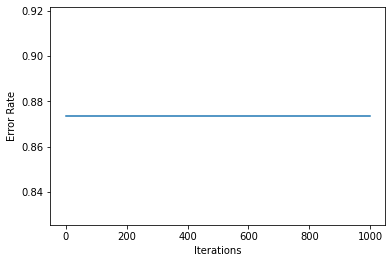

In [22]:
# Extract the features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))


# Define the cost function
def cost_function(X, y, theta):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))
    return J

# Define the gradient descent function to update the weights
def gradient_descent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta = theta - (alpha/m) * np.dot(X.T, (h-y))
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

# Initialize the weights randomly
theta = np.random.rand(X.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iters = 1000

# Train the logistic regression model
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Calculate the error rate for each iteration
error_rate = []
for i in range(num_iters):
    y_pred = sigmoid(np.dot(X, theta)) >= 0.5
    error_rate.append(1 - np.mean(y_pred == y))

# Plot the decrease rate of error over the iterations
plt.plot(range(num_iters), error_rate)
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.show()

# Plot the accuracy rate

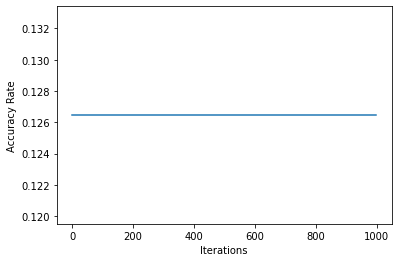

In [23]:
# Calculate the accuracy rate for each iteration
accuracy_rate = []
for i in range(num_iters):
    y_pred = sigmoid(np.dot(X, theta)) >= 0.5
    accuracy_rate.append(np.mean(y_pred == y))

# Plot the accuracy rate over the iterations
plt.plot(range(num_iters), accuracy_rate)
plt.xlabel('Iterations')
plt.ylabel('Accuracy Rate')
plt.show()

# Project 2: **Prerceptron**

The Perceptron algorithm is a type of machine learning algorithm that can learn to make predictions based on input data. It's a simple but powerful way to classify data based on its features and It's called a "neural network" because it's loosely inspired by the way that neurons work in the brain. It can be used for a wide variety of applications, from filtering spam emails to recognizing handwritten digits.

Here's how it works:

* Imagine that we have a bunch of data points that you want to classify into one of two categories (for example, "spam" or "not spam"). Each data point has a set of features, like the length of an email or the number of times a word appears in a message.

* We start with some initial "weights" and "biases" for each feature. These weights and biases are just numbers that are used to combine the features in a way that gives us a prediction.

* For each data point, we calculate a prediction by multiplying each feature by its weight, adding up the results, and adding a bias. If the prediction is greater than some threshold, we classify the data point into one category. If it's less than the threshold, we classify it into the other category.

* In next stage, we compare the predicted category to the actual category, and adjust the weights and biases to make the prediction more accurate. The adjustment is made by multiplying the difference between the predicted and actual category by each feature value, and adding the results to the weights and biases.

* We repeat this process for all of the data points, making adjustments to the weights and biases as we go. We keep doing this until the predictions are accurate enough (or until we've gone through a certain number of iterations).

At first, we load the Iris dataset and extract the features (X) and labels (y). 

In [26]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract features and labels
X = iris.data
y = iris.target

Then we define a Perceptron class with predict and train methods. The predict method computes the weighted sum of the input data x and the weights self.weights, and applies the step function as the activation function to return the predicted label. The train method updates the weights and bias based on the prediction error.

We create a Perceptron instance with 4 input neurons, to match the 4 features in the Iris dataset. We train the Perceptron on the Iris dataset using 1000 epochs and a learning rate of 0.1. Finally, we test the accuracy of the Perceptron on the Iris dataset by counting the number of correctly predicted labels and dividing by the total number of samples.

In [29]:
class Perceptron:
    def __init__(self, m):
        self.m = m
        self.weights = np.zeros(m)
        self.bias = 0
        
    def predict(self, x):
        # Compute the weighted sum
        z = np.dot(x, self.weights) + self.bias
        
        # Apply the activation function
        return 1 if z > 0 else 0
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for x, label in zip(X, y):
                # Predict the label using the current weights
                y_pred = self.predict(x)
                
                # Update the weights and bias if the prediction is incorrect
                if y_pred != label:
                    self.weights += learning_rate * label * x
                    self.bias += learning_rate * label
                    
# Create a Perceptron with 4 input neurons (to match the 4 features in the Iris dataset)
p = Perceptron(4)

# Train the Perceptron on the Iris dataset
p.train(X, y, epochs=1000, learning_rate=0.1)

# Test the accuracy of the Perceptron on the Iris dataset
correct = 0
total = len(X)

for x, label in zip(X, y):
    if p.predict(x) == label:
        correct += 1

accuracy = correct / total
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


# Convert the Iris dataset into a binary classification problem

In [30]:
# Remove samples belonging to class 2 (Virginica)
X = X[:100]
y = y[:100]

# Convert labels to binary (Setosa=0, Versicolor=1)
y = np.where(y==0, 0, 1)

# Shuffle the dataset
idx = np.arange(len(X))
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Split the dataset into training and testing sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

We remove all samples belonging to the third class (Virginica) by slicing the arrays X and y. We convert the remaining labels (Setosa=0, Versicolor=1) using NumPy's where function.Next, we shuffle the dataset using NumPy's shuffle function and split it into training and testing sets (80% for training and 20% for testing) using NumPy's array slicing.

We can now use the modified X_train, y_train, X_test, and y_test arrays to train and test our Perceptron classifier for the binary classification problem.

# Plot of the binary classification problem using only the Sepal length and Sepal width features

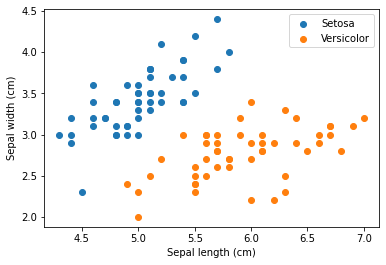

In [31]:
# Remove samples belonging to class 2 (Virginica)
X = X[:100, :2] # Use only the first two features
y = y[:100]
y = np.where(y==0, 0, 1)

# Shuffle the dataset
idx = np.arange(len(X))
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Plot the binary classification problem
plt.scatter(X[y==0, 0], X[y==0, 1], label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

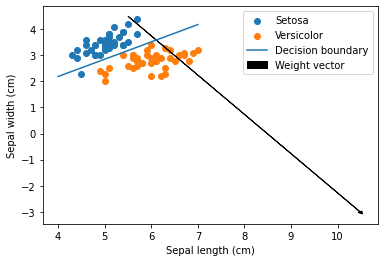

In [35]:
# Remove samples belonging to class 2 (Virginica)
X = X[:100, :2] # Use only the first two features
y = y[:100]
y = np.where(y==0, 0, 1)

# Shuffle the dataset
idx = np.arange(len(X))
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Split the dataset into training and testing sets
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

class Plot:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, lr=0.1, epochs=100):
        # Initialize weights and bias to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                # Compute the activation function
                a = np.dot(xi, self.weights) + self.bias
                
                # Compute the predicted label
                y_hat = np.where(a > 0, 1, 0)
                
                # Update weights and bias if the predicted label is incorrect
                if y_hat != yi:
                    self.weights += lr * (yi - y_hat) * xi
                    self.bias += lr * (yi - y_hat)

    def predict(self, X):
        # Compute the activation function
        a = np.dot(X, self.weights) + self.bias
        
        # Compute the predicted labels
        y_hat = np.where(a > 0, 1, 0)
        
        return y_hat


# Train the Perceptron on the training set
model = Plot()
model.fit(X_train, y_train)

# Compute the decision boundary (i.e., the line separating the two classes)
w1, w2 = model.weights
b = model.bias
x1 = np.linspace(4, 7, 100)
x2 = -(w1/w2) * x1 - (b/w2)

# Plot the decision boundary and the weight vector
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='Setosa')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='Versicolor')
plt.plot(x1, x2, label='Decision boundary')
plt.arrow(5.5, 4.5, w1, w2, head_width=0.1, head_length=0.1, fc='k', ec='k', label='Weight vector')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Error rate

The code creates a Perceptron_error class and trains it on the binary classification problem with only the Sepal length and width features. The fit method returns the final error percentage and the list of error counts during training. After training the model, the code plots the error rate during training using Matplotlib's plot function. The x-axis represents the number of epochs (i.e., the number of times the entire training set was presented to the model), while the y-axis represents the number of errors made by the model during that epoch.

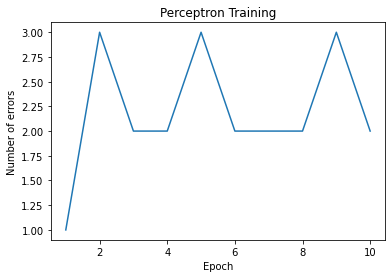

In [38]:
class Perceptron_error:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0
        
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return np.where(z > 0, 1, 0)
    
    def fit(self, x, y, num_epochs=100):
        errors = []
        for epoch in range(num_epochs):
            error_count = 0
            for xi, yi in zip(x, y):
                prediction = self.predict(xi)
                update = yi - prediction
                self.weights += update * xi
                self.bias += update
                error_count += int(update != 0)
            errors.append(error_count)
        
        error_percentage = errors[-1] / len(y) * 100
        return error_percentage, errors

iris = load_iris()
X = iris.data[:, :2]  # Select only Sepal length and Sepal width
y = (iris.target != 0) * 1  # Convert to binary classification problem

# Train the Perceptron model
perceptron = Perceptron_error(num_features=2)
error_percentage, errors = perceptron.fit(X, y, num_epochs=10)

# Plot the error rate during training
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.title('Perceptron Training')
plt.show()

In [39]:
print(f'Final error percentage: {error_percentage:.2f}%')

Final error percentage: 1.33%
